# From here

In [33]:
!pip freeze > requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *

In [71]:
EU_milk = pd.read_pickle('data/eu.pickle')
US_milk = pd.read_pickle('data/us.pickle')
china_milk = pd.read_pickle('data/cn.pickle')
fred_series = pd.read_pickle('data/fred.pickle')

# US

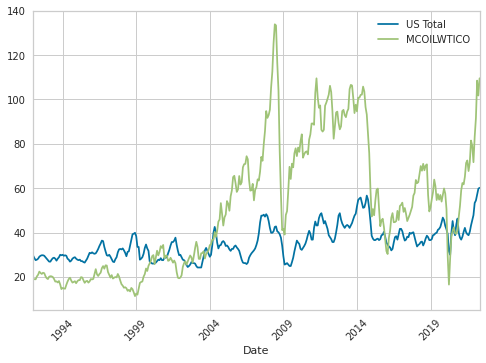

In [32]:
data = US_milk.join(fred_series)
data.loc['1992-01-01':,['US Total', 'MCOILWTICO']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('US_WTI_prices.jpg')
plt.show()

In [20]:
US_states = ['California', 'Wisconsin', 'Idaho', 'Texas', 'New York', 'Michigan', 'Minnesota', 'Pennsylvania', 'New Mexico', 'Washington', 'US Total']
fred_list = ['MCOILBRENTEU', 'MCOILWTICO', 'MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO']

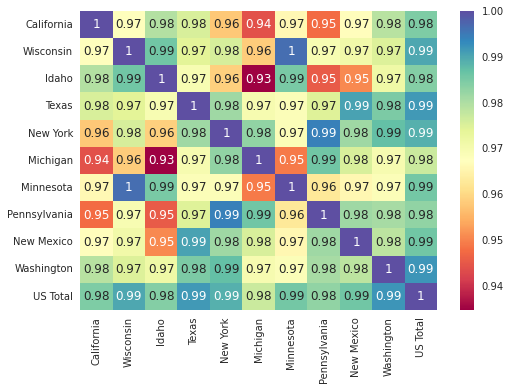

In [12]:
import seaborn as sns
dataplot = sns.heatmap(data[US_states].corr(), cmap="Spectral", annot=True)
plt.savefig('US_states_corr.jpg')

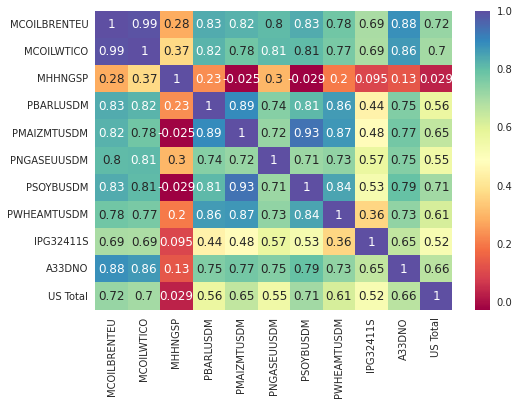

In [13]:
dataplot = sns.heatmap(data[fred_list + ['US Total']].corr(), cmap="Spectral", annot=True)
plt.savefig('US_fred_corr.jpg')

## From 1992 to May 2022

In [14]:
limits = [['1992-01-01','2022-05-31']]
indicators = ['MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO']

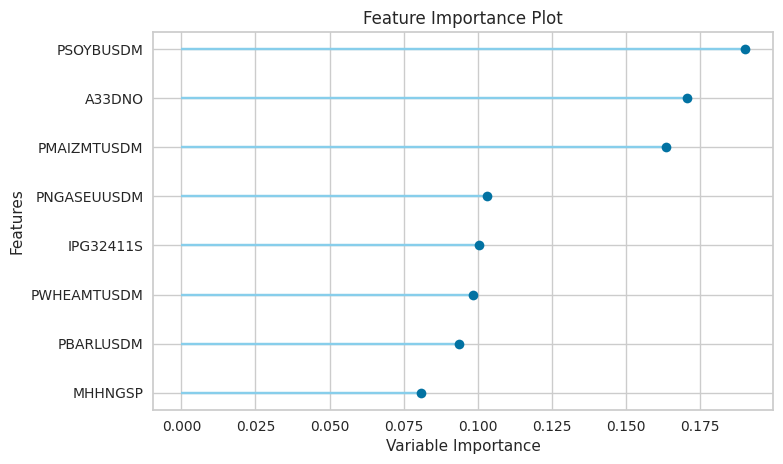

In [15]:
for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from 1992 to May 2022')
    best = compare_models(fold=5)
    best.get_params()

In [21]:
plot_model(best, save=True)
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## From May 2004 to May 2022

In [22]:
limits = [['2004-05-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from May 2004 to May 2022')
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.5947,13.2289,3.6122,0.7271,0.0942,0.0696,0.1220
ada,AdaBoost Regressor,3.3119,19.5007,4.3904,0.5936,0.1115,0.0872,0.1100
rf,Random Forest Regressor,2.9063,19.2885,4.3847,0.5841,0.1120,0.0782,0.1680
xgboost,Extreme Gradient Boosting,3.1474,19.8660,4.4123,0.5810,0.1141,0.0845,6.4600
gbr,Gradient Boosting Regressor,3.2377,21.5606,4.6226,0.5395,0.1187,0.0869,0.0640
lightgbm,Light Gradient Boosting Machine,3.7634,22.6741,4.7487,0.5115,0.1212,0.0999,0.0380
dt,Decision Tree Regressor,3.6215,33.3072,5.6456,0.3155,0.1439,0.0927,0.0260
knn,K Neighbors Regressor,4.5079,36.0666,5.9700,0.2432,0.1487,0.1194,0.0280
en,Elastic Net,4.7183,41.9210,6.4086,0.1450,0.1575,0.1225,0.0260
lasso,Lasso Regression,4.7122,41.8985,6.4092,0.1447,0.1577,0.1226,0.0260


In [ ]:
plot_model(best, save=True)

In [34]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## From April 2015 to May 2022

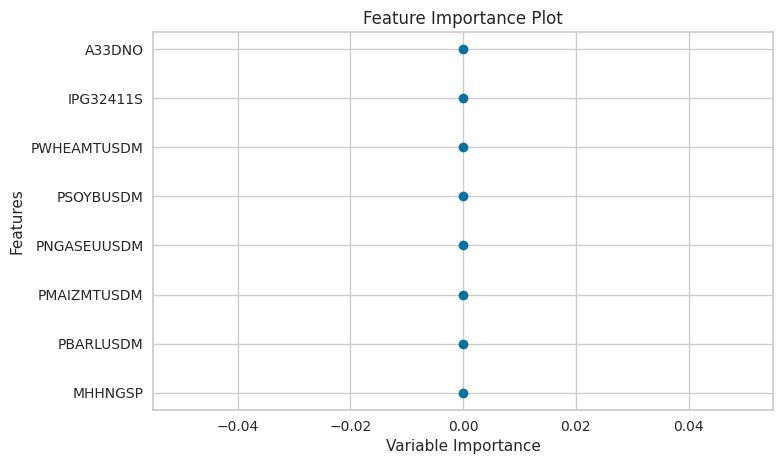

In [32]:
limits = [['2015-04-01','2022-05-31']]

for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['US Total']]
    s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from April 2015 to May 2022')
    best = compare_models(fold=5)
    best.get_params()

In [ ]:
plot_model(best, save=True)
plot_model(best, plot='feature', save=True)

# EU

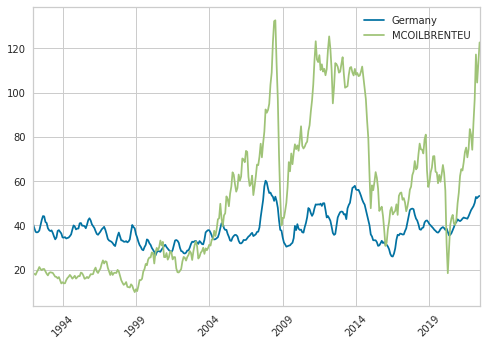

In [85]:
data = EU_milk.join(fred_series)
data.loc['1992-01-01':,['Germany', 'MCOILBRENTEU']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('Germany_Brent_prices.jpg')
plt.show()

In [86]:
EU_countries = ['Germany', 'France', 'Netherlands', 'Italy', 'Poland', 'Ireland', 'Spain', 'Denmark', 'Belgium', 'Austria', 'EU(without UK)']

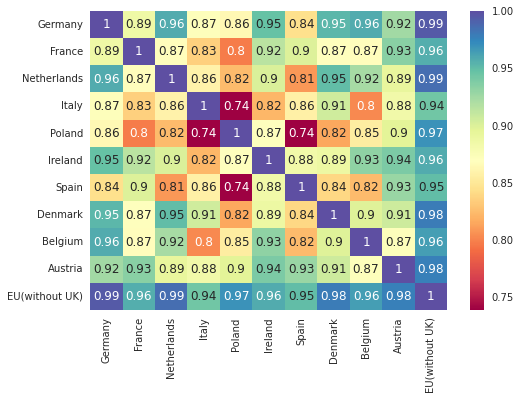

In [88]:
import seaborn as sns
dataplot = sns.heatmap(data[EU_countries].corr(), cmap="Spectral", annot=True)
plt.savefig('EU_states_corr.jpg')

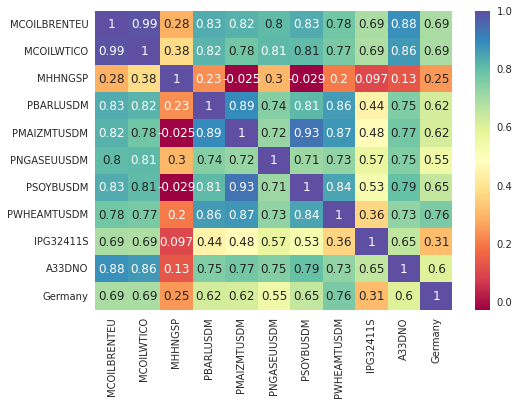

In [89]:
dataplot = sns.heatmap(data[fred_list + ['Germany']].corr(), cmap="Spectral", annot=True)
plt.savefig('Germany_fred_corr.jpg')

## From 1992 to May 2022

In [23]:
limits = [['1992-01-01','2022-05-31']]
indicators = ['MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO']

In [26]:
for date in limits:
    expr = data.loc[date[0]:date[1],indicators + ['Germany']]
    s = setup(expr, target = 'Germany', session_id=123, experiment_name='US milk from 1992 to May 2022')
    best = compare_models(fold=5)
    best.get_params()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5865,6.2170,2.4384,0.6448,0.0773,0.0524,0.1320
rf,Random Forest Regressor,1.8903,7.6051,2.7030,0.5812,0.0830,0.0610,0.1920
gbr,Gradient Boosting Regressor,1.9036,7.9140,2.7527,0.5532,0.0865,0.0626,0.0800
lightgbm,Light Gradient Boosting Machine,2.0004,8.4531,2.8375,0.5442,0.0878,0.0651,0.0440
ada,AdaBoost Regressor,2.2942,9.0036,2.9649,0.5014,0.0912,0.0738,0.0820
xgboost,Extreme Gradient Boosting,1.9284,8.7406,2.9015,0.4884,0.0930,0.0637,6.6840
dt,Decision Tree Regressor,2.3052,13.2435,3.5487,0.2259,0.1079,0.0742,0.0260
omp,Orthogonal Matching Pursuit,2.8596,16.0885,3.9154,0.1510,0.1181,0.0915,0.0280
lasso,Lasso Regression,2.8507,16.3605,3.9566,0.1301,0.1196,0.0916,0.0280
en,Elastic Net,2.8500,16.4453,3.9683,0.1246,0.1199,0.0916,0.0260


# China

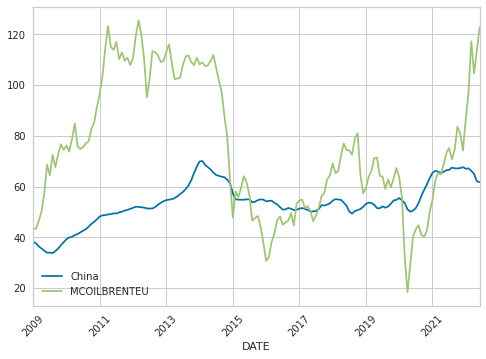

In [81]:
china_milk.name = 'China'
data = fred_series.join(china_milk)
data.loc['2009-01-01':,['China', 'MCOILBRENTEU']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('China_Brent_prices.jpg')
plt.show()

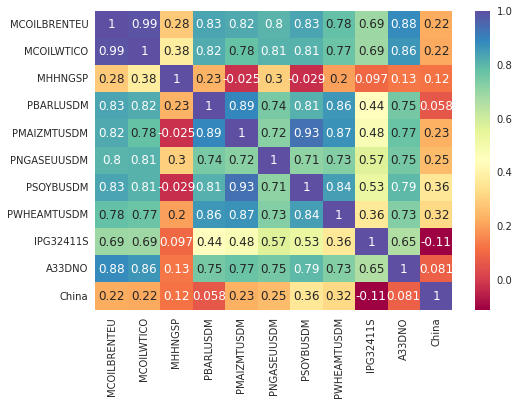

In [83]:
dataplot = sns.heatmap(data[fred_list + ['China']].corr(), cmap="Spectral", annot=True)
plt.savefig('China_fred_corr.jpg')